# Titanic: Machine Learning from Disaster

설명 및 데이터 원본 : https://www.kaggle.com/c/titanic

Pridict survival on the Titanic

- Defining the provlem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Feature selection
- Modeling
- Testing

In [1]:
import seaborn as sns
import pandas as pd
from IPython.display import Image


# 1. Defining the provlem statement

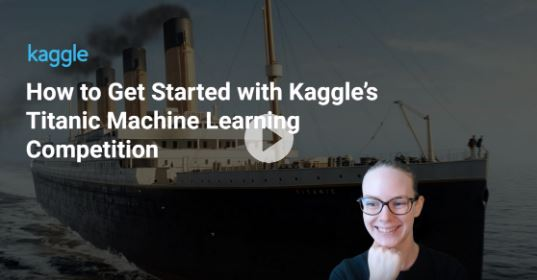

In [1]:
from IPython.display import Image
Image("./images/titanic.jpg")

In [ ]:
캐글 링크 참조해서 description 추가

# 2. Collecting the data

In [2]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 3. Exploratory data analysis

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary

- Passengerid : 승객 아이디
- Survived : 생존 여부
- Pclass : 등급
- Name : 성함
- Sex : 성별
- Age : 나이
- SibSp : 형제, 자매, 배우자 수
- Parch : 부모, 자식 수
- Ticket : 티켓번호
- Fare : 요금
- Cabin : 좌석번호
- Embarked : 탑승 항구

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
결측치 분석

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Bar Chart for Categoricla Features

- Pclass
- Sex
- SibSp
- Parch
- Embarked

In [25]:
def bar_chart(feature) : 
    survived = train[train['Survived']==1][feature].value_counts()  # 생존자의 feature매개변수(칼럼) 값을 합산하여 변수에 저장
    dead = train[train['Survived']==0][feature].value_counts() # 위와같은 방식으로 사망자 총합을 변수에 저장
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))  # stacked는 누적 그래프 명령어. False로 주면 옆에 붙어서 나옴

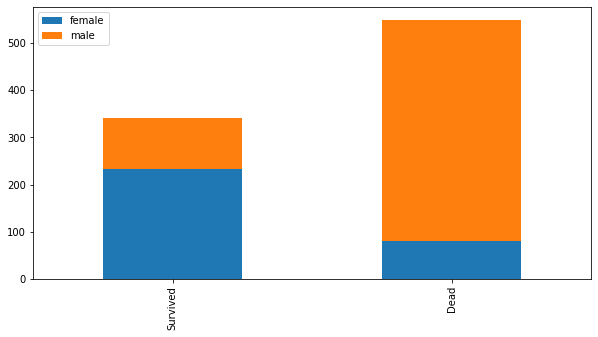

In [32]:
bar_chart('Sex')

해석 : 생존자 중 여성의 비율이 훨씬 높았다.

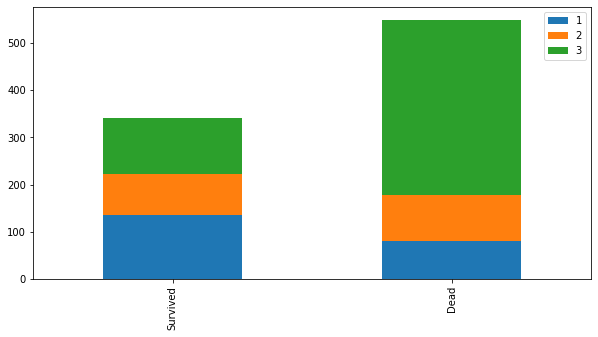

In [33]:
bar_chart('Pclass')

In [ ]:
해석 : 등급에 따른 생존률이 달랐다.

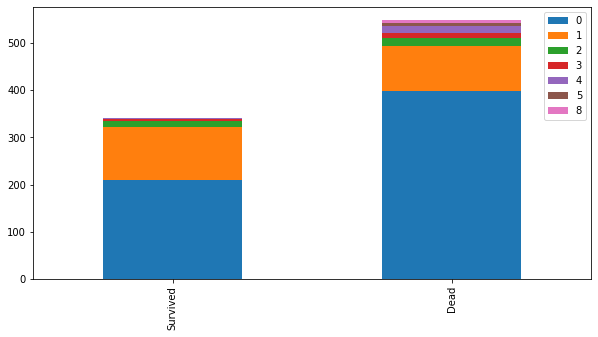

In [34]:
bar_chart('SibSp')

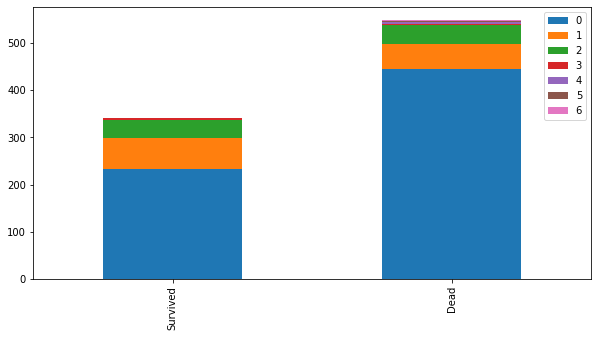

In [35]:
bar_chart('Parch')

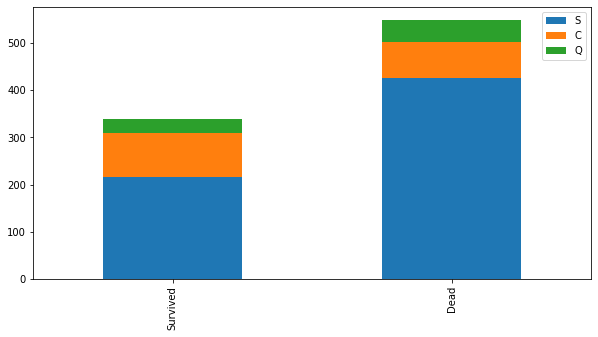

In [36]:
bar_chart('Embarked')

# 4. Feature engineering

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
컬럼들을 피처로 보면된다.
피처들을 백터(숫자들의 배열)로 만들어줘야한다. 

따라서 올바른 머신러닝 분석을 위해
1. 문자 속성을 가진 칼럼은 숫자로 바꿔준다.
2. NaN 값을 처리한다.

SyntaxError: invalid syntax (<ipython-input-40-e5a674b7931f>, line 1)

# 4.2 Name

In [8]:
dataset

NameError: name 'dataset' is not defined

In [ ]:
두번째 질문은 정규식(regular expression)을 사용한 것인데요, 
공백이 있고 Mr, Mrs, Miss 있고, 
또 이름이 나오는 패턴에서 Mr, Mrs, Miss만 추출한다고 보시면 될 거 같습니다.

In [26]:
train_test_data = [train, test]

for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-a]+)\.', expand=False)
    

In [23]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Sir           1
Ms            1
Lady          1
Mme           1
Jonkheer      1
Countess      1
Don           1
Name: Title, dtype: int64

In [31]:

train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)', expand=False)

In [32]:

train['Title'].value_counts()

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Impe             3
Planke           3
Gordon           2
Col              2
Mlle             2
Major            2
Mulder           1
Pelsmaeker       1
der              1
Cruyssen         1
Don              1
Steen            1
the              1
Carlo            1
Messemaeker      1
Billiard         1
Capt             1
Ms               1
Melkebeke        1
Walle            1
Mme              1
Jonkheer         1
Shawah           1
Velde            1
Name: Title, dtype: int64